In [9]:
using DifferentialEquations
using Plots, LaTeXStrings
using LinearAlgebra

### Definitions and functions

>Basic model

In [49]:
x_labels = ["x₁" "x₂" "x₃" "x₄" "x₅"]
μ_labels = ["μ₁" "μ₂" "μ₃" "μ₄" "μ₅"]

s_in = 2

n = 5 # 3 ≤ n ≤ 20

a = [i for i in 1:n] 
b = [i^2 for i in 1:n]  

d = [-1; [-2 for i in 1:(n-2)]; -1]
d1 = [1 for i in 1:(n-1)]
matrix_M = SymTridiagonal(d, d1)

function μ(s, i) 
    return (a[i]*s)/(5*b[i]+s)
end

μ (generic function with 1 method)

In [52]:
N = 100
s_f = 150
s_vector = range(0, stop=s_f, length=N)
μ_matrix = [ [μ(s,i) for s in s_vector] for i in 1:n ];

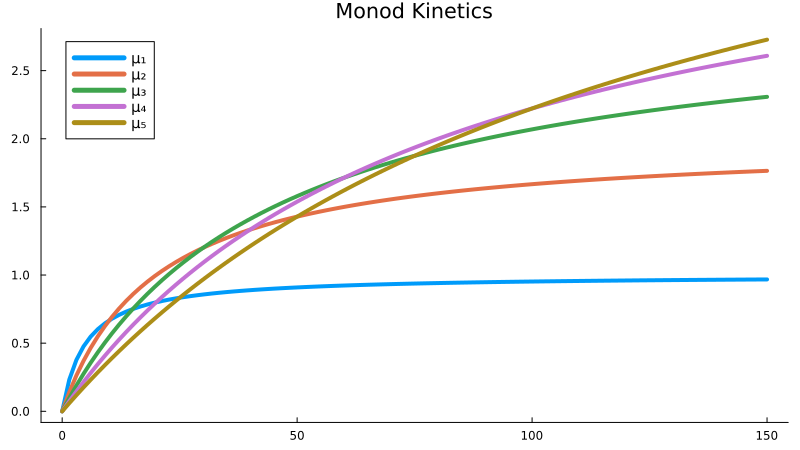

In [60]:
p = plot(s_vector, μ_matrix,label=["μ₁" "μ₂" "μ₃" "μ₄" "μ₅"], lw=4, titlefont = font(14), 
legendfont = font(10), size=(800,450), grid=false, title = "Monod Kinetics" )#, background_color=:transparent) 

In [59]:
# savefig(p,"kinetics3.pdf")

"/Users/claudiaalvarez/Documents/github/Journees-MODE/kinetics3.pdf"

In [15]:
function f(y, p, t)
    x = y[1:n]
    s = y[n+1]
    u, e = p
    mu = (a*s)./(b.+s)
    return [(mu.-u).*x + e*(matrix_M*x); (u*(s_in-s))-sum(mu.*x)]
end
 
function solvePCS(f,y0,tf,u,e)
    p = [u, e]
    tspan = (0.0, tf)
    prob = ODEProblem(f, y0, tspan, p)
    return solve(prob)
end;


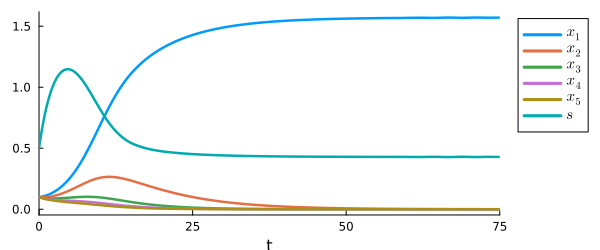

In [16]:
#example of the unperturbed system solution
u = 0.3
e = 0
y0 = [0.1*ones(5); 0.5] #FOR u=0.3 DONT USE x_0>0.5
tf = 75.0
sol = solvePCS(f,y0,tf,u,e);
p= plot(sol,label=[L"x_1" L"x_2" L"x_3" L"x_4" L"x_5" L"s"], lw=2.5, titlefont = font(14), legendfont = font(10), 
size=(600,250), grid=false, legend=:outertopright)
# title!(L"(PCS) solution for $ε = $"*string(e)) 

In [99]:
# savefig(p,"figures/CEP.pdf")

"/Users/claudiaalvarez/Downloads/simulations/figures/CEP.pdf"

In [57]:
#computing the values of lambda_i
u = 0.31
lmdas = 1 .- (u*b)./(a .- u)
print(lmdas)

#solutions with and without perturbation
x_star = [lmdas[1]; 0; 0; 0; 0]
x_f = sol.u[size(sol.t)[1]]

[0.7623414940978716, 0.663665742178478, 0.6518807594939287, 0.6257363721757816, 0.11973249221515847]

5-element Vector{Float64}:
 0.2949115829340855
 0.19259539705935327
 0.11932016923049363
 0.0687239803977457
 0.03662640875554814

### Simulations and plotting 

>Simulation of all species for different values of $\varepsilon$ 

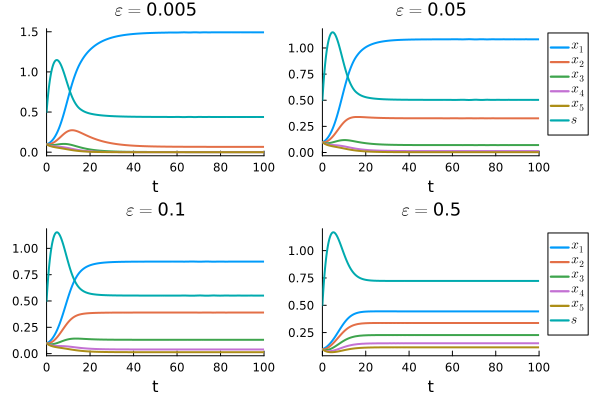

In [17]:
#same i.c., different ε 
u = 0.3
ei = [0.005, 0.05, 0.1, 0.5]
x0i = 0.1
y0 = [x0i*ones(5); 0.5]
tf = 100.0
plots = [plot() plot() plot() plot()]
#ylims=(0.0,0.6)
for i in 1:4
    e = ei[i]
    sol = solvePCS(f,y0,tf,u,e);
    if (i == 2 || i==4)
        ploti = plot(sol, label=[L"x_1" L"x_2" L"x_3" L"x_4" L"x_5" L"s"], lw=1, title=L"$ε = $"*string(e), legend=:outertopright)
    else
        ploti = plot(sol, label=[L"x_1" L"x_2" L"x_3" L"x_4" L"x_5" L"s"], lw=1, title=L"$ε = $"*string(e), legend=false)
    end
    plots[i] = ploti
end
p = plot(plots[1], plots[2], plots[3], plots[4], layout = grid(2, 2, widths =[0.45 ,0.55]) , titlefont = font(12),
    lw=2, legendfont = font(9), size=(600,400), grid=false, background_color_legend="white")


In [151]:
# savefig(p, "figures/x0_const.pdf")

"/Users/claudiaalvarez/Downloads/simulations/figures/x0_const.pdf"